In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [53]:
df = pd.read_csv('data/training_final_latcorr.csv')

In [54]:
pd.set_option('display.max_columns', None)
df

,field_1,Name,Longitude,Latitude,CO2 (mg C m¯² d¯¹),CH4 (mg C m-2 d-1),CO2 (g/kWh),CH4 (g/kWh),Area / Electricity,Area_km2,Age,Volume_km3,Areakm2_div_Volkm3,org_c,temp_annual_avg,temp_diff_summer_winter_lc,temp_spring_avg_lc,temp_spring_avg,temp_summer_avg_lc,temp_summer_avg,temp_fall_avg_lc,temp_fall_avg,temp_winter_avg_lc,temp_winter_avg,NDVI_annual_avg,NDVI_spring_avg_lc,NDVI_spring_avg,NDVI_summer_avg_lc,NDVI_summer_avg,NDVI_fall_avg_lc,NDVI_fall_avg,NDVI_winter_avg_lc,NDVI_winter_avg,npp_annual_avg,npp_spring_avg_lc,npp_spring_avg,npp_summer_avg_lc,npp_summer_avg,npp_fall_avg_lc,npp_fall_avg,npp_winter_avg_lc,npp_winter_avg,erosion,precip
0,116,Segredo,-52.100000,-25.783333,600.0,29.9,15.167696,0.274857,0.018889,82.0,13.0,3.0,27.333333,48.768551,17.059999,7.630667,18.243999,17.054667,20.768000,13.137333,17.054667,18.243999,13.137333,20.768000,200.666672,212.666672,221.333328,238.666672,219.333328,221.333328,212.666672,219.333328,238.666672,200.500000,212.000000,207.666672,202.000000,180.333328,207.666672,212.000000,180.333328,202.000000,21.503389,889
1,117,Segredo,-52.100000,-25.783333,1306.1,5.0,33.017545,0.045963,0.018889,82.0,13.0,3.0,27.333333,48.768551,17.059999,7.630667,18.243999,17.054667,20.768000,13.137333,17.054667,18.243999,13.137333,20.768000,200.666672,212.666672,221.333328,238.666672,219.333328,221.333328,212.666672,219.333328,238.666672,200.500000,212.000000,207.666672,202.000000,180.333328,207.666672,212.000000,180.333328,202.000000,21.503389,889
2,45,Itaipu,-54.550000,-25.383333,328.6,NaN,6.603175,NaN,0.015015,1350.0,14.0,129.0,10.465116,44.606594,21.125334,8.385334,21.429333,21.202667,25.158667,16.773333,21.202667,21.429333,16.773333,25.158667,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,87.000000,79.000000,85.333336,87.000000,96.666664,85.333336,79.000000,96.666664,87.000000,32.145058,830
3,104,RibeirÃ£o das Lages,-43.883333,-22.700000,22.1,NaN,NaN,NaN,NaN,30.0,95.0,0.5,60.000000,60.257137,20.374001,5.473333,20.393333,20.902666,23.022667,17.549334,20.902666,20.393333,17.549334,23.022667,232.333328,226.000000,242.333328,237.666672,223.333328,242.333328,226.000000,223.333328,237.666672,151.416672,153.333328,179.333328,156.666672,170.666672,179.333328,153.333328,170.666672,156.666672,0.541019,757
4,7,Barra Bonita,-48.583333,-22.516667,1036.4,9.9,3187.260766,11.071149,2.297872,324.0,42.0,4.0,81.000000,37.520664,20.853001,5.780001,21.605333,20.834667,23.501333,17.721333,20.834667,21.605333,17.721333,23.501333,160.250000,123.666664,178.333328,187.333328,151.666672,178.333328,123.666664,151.666672,187.333328,132.750000,94.000000,166.000000,130.000000,141.000000,166.000000,94.000000,141.000000,130.000000,7.974369,724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,68,Lule,21.666667,65.833333,12.3,NaN,20.541089,NaN,1.247826,574.0,70.0,NaN,NaN,61.908791,1.616667,24.341333,0.884000,0.884000,14.160000,14.160000,1.786667,1.786667,-10.181334,-10.181334,131.750000,106.333336,106.333336,226.000000,226.000000,159.333328,159.333328,35.333332,35.333332,99.250000,58.333332,58.333332,180.333328,180.333328,51.333332,51.333332,107.000000,107.000000,0.004779,258
150,66,Lokka,27.733333,67.816667,545.5,79.0,632.052667,33.285333,0.865753,316.0,28.0,2.1,150.476191,60.026501,-1.679333,24.858666,-3.041333,-3.041333,11.264000,11.264000,-1.165333,-1.165333,-13.594666,-13.594666,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,95.583336,47.666668,47.666668,114.000000,114.000000,39.666668,39.666668,181.000000,181.000000,0.001489,270
151,67,Lokka,27.733333,67.816667,288.0,115.0,333.696000,48.453333,0.865753,316.0,28.0,2.1,150.476191,60.026501,-1.679333,24.858666,-3.041333,-3.041333,11.264000,11.264000,-1.165333,-1.165333,-13.594666,-13.594666,255.000000,255.000000,255.000000,255.000000,255.000000,255.0

In [55]:
#random forest does not need scaling

#distance-based methods such as knn require scaling
#linear regression needs scaling
#svm needs scalaling

In [56]:
df.rename(columns = {'CH4 (mg C m-2 d-1)':'CH4', 'CO2 (mg C m¯² d¯¹)':'CO2'}, inplace = True) 

In [57]:
df.columns

Index(['field_1', 'Name', 'Longitude', 'Latitude', 'CO2', 'CH4', 'CO2 (g/kWh)',
       'CH4 (g/kWh)', 'Area / Electricity', 'Area_km2', 'Age', 'Volume_km3',
       'Areakm2_div_Volkm3', 'org_c', 'temp_annual_avg',
       'temp_diff_summer_winter_lc', 'temp_spring_avg_lc', 'temp_spring_avg',
       'temp_summer_avg_lc', 'temp_summer_avg', 'temp_fall_avg_lc',
       'temp_fall_avg', 'temp_winter_avg_lc', 'temp_winter_avg',
       'NDVI_annual_avg', 'NDVI_spring_avg_lc', 'NDVI_spring_avg',
       'NDVI_summer_avg_lc', 'NDVI_summer_avg', 'NDVI_fall_avg_lc',
       'NDVI_fall_avg', 'NDVI_winter_avg_lc', 'NDVI_winter_avg',
       'npp_annual_avg', 'npp_spring_avg_lc', 'npp_spring_avg',
       'npp_summer_avg_lc', 'npp_summer_avg', 'npp_fall_avg_lc',
       'npp_fall_avg', 'npp_winter_avg_lc', 'npp_winter_avg', 'erosion',
       'precip'],
      dtype='object')

## CO2

### Precip


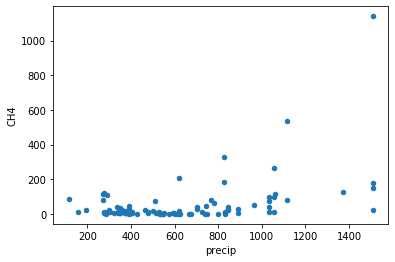

In [58]:
df.plot('precip','CH4',kind='scatter',)

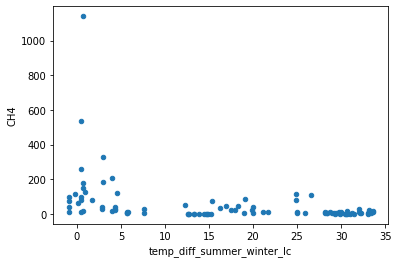

In [60]:
df.plot('temp_diff_summer_winter_lc','CH4',kind='scatter',)

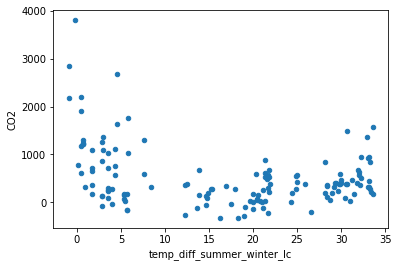

In [62]:
df.plot('temp_diff_summer_winter_lc','CO2',kind='scatter',)

### Area, Area/Volume, Age, Erosion

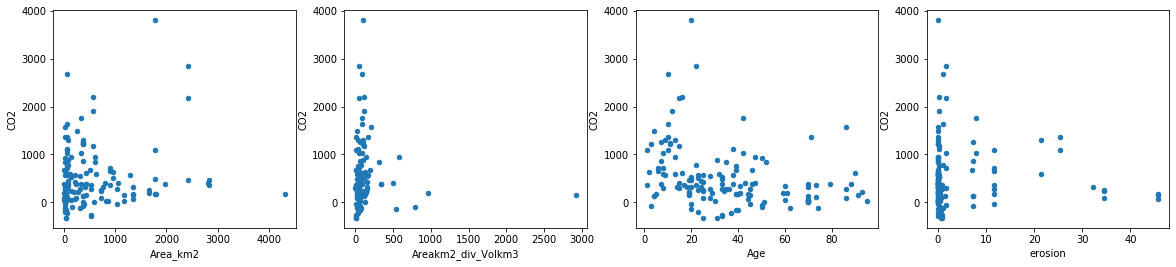

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,4))
df.plot(ax=axes[0], kind='scatter', x='Area_km2', y='CO2')
df.plot(ax=axes[1], kind='scatter', x='Areakm2_div_Volkm3', y='CO2')
df.plot(ax=axes[2], kind='scatter', x='Age', y='CO2')
df.plot(ax=axes[3], kind='scatter', x='erosion', y='CO2')
plt.show()

### Area, Area/Volume, Age, Erosion

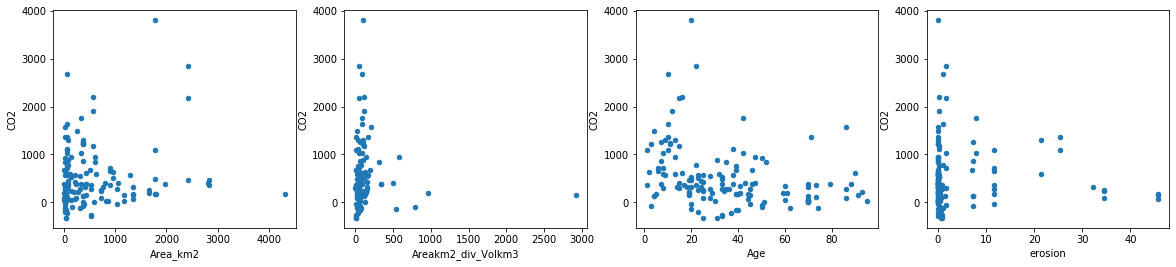

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,4))
df.plot(ax=axes[0], kind='scatter', x='Area_km2', y='CO2')
df.plot(ax=axes[1], kind='scatter', x='Areakm2_div_Volkm3', y='CO2')
df.plot(ax=axes[2], kind='scatter', x='Age', y='CO2')
df.plot(ax=axes[3], kind='scatter', x='erosion', y='CO2')
plt.show()

### Temp seasonal avgs

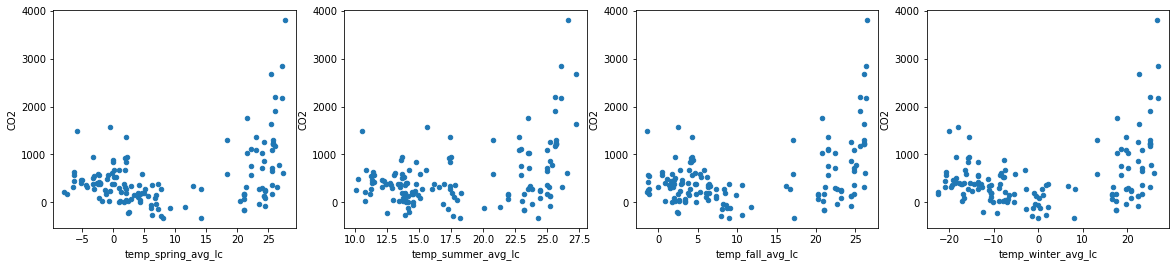

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,4))
df.plot(ax=axes[0], kind='scatter', x='temp_spring_avg_lc', y='CO2')
df.plot(ax=axes[1], kind='scatter', x='temp_summer_avg_lc', y='CO2')
df.plot(ax=axes[2], kind='scatter', x='temp_fall_avg_lc', y='CO2')
df.plot(ax=axes[3], kind='scatter', x='temp_winter_avg_lc', y='CO2')
plt.show()

### NPP seasonal avgs

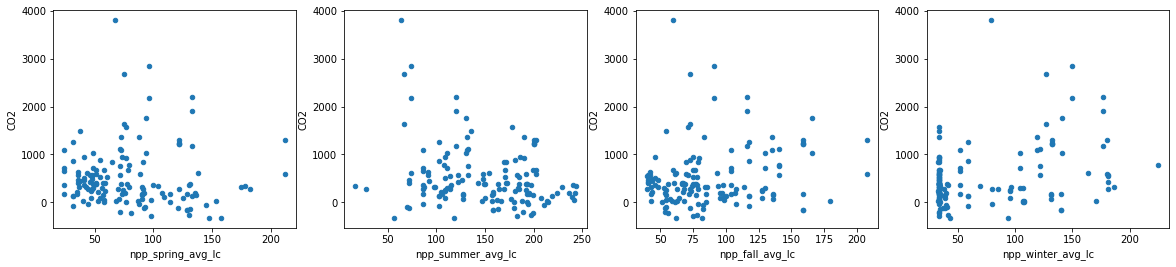

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,4))
df.plot(ax=axes[0], kind='scatter', x='npp_spring_avg_lc', y='CO2')
df.plot(ax=axes[1], kind='scatter', x='npp_summer_avg_lc', y='CO2')
df.plot(ax=axes[2], kind='scatter', x='npp_fall_avg_lc', y='CO2')
df.plot(ax=axes[3], kind='scatter', x='npp_winter_avg_lc', y='CO2')
plt.show()

### NDVI seasonal avgs

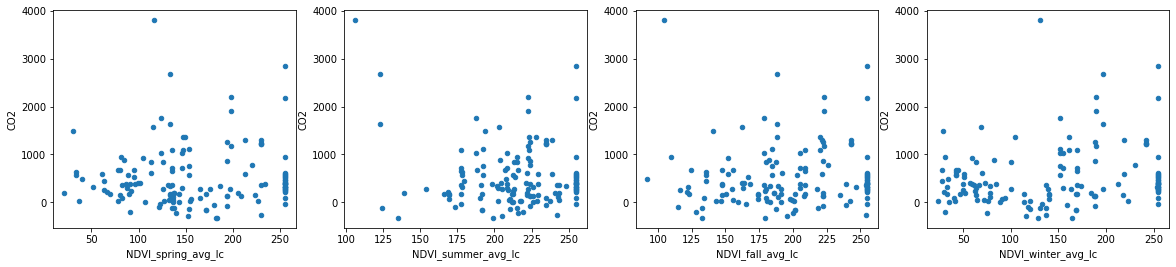

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,4))
df.plot(ax=axes[0], kind='scatter', x='NDVI_spring_avg_lc', y='CO2')
df.plot(ax=axes[1], kind='scatter', x='NDVI_summer_avg_lc', y='CO2')
df.plot(ax=axes[2], kind='scatter', x='NDVI_fall_avg_lc', y='CO2')
df.plot(ax=axes[3], kind='scatter', x='NDVI_winter_avg_lc', y='CO2')
plt.show()

## CH4 EDA

### Area, Area/Volume, Age, Erosion

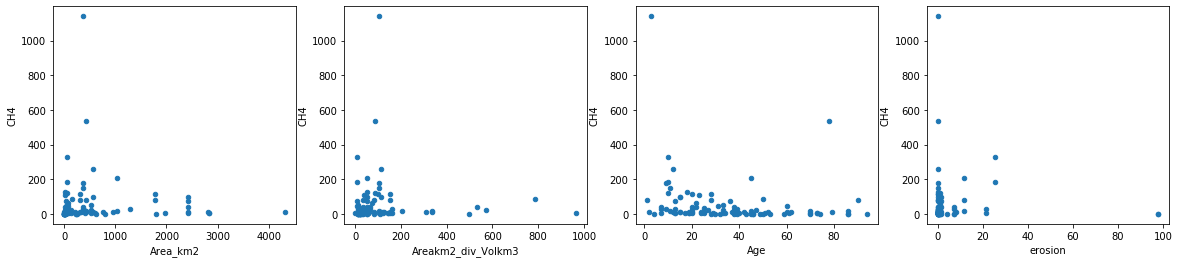

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,4))
df.plot(ax=axes[0], kind='scatter', x='Area_km2', y='CH4')
df.plot(ax=axes[1], kind='scatter', x='Areakm2_div_Volkm3', y='CH4')
df.plot(ax=axes[2], kind='scatter', x='Age', y='CH4')
df.plot(ax=axes[3], kind='scatter', x='erosion', y='CH4')
plt.show()

### Annual avg: Temp, npp, NDVI; org C

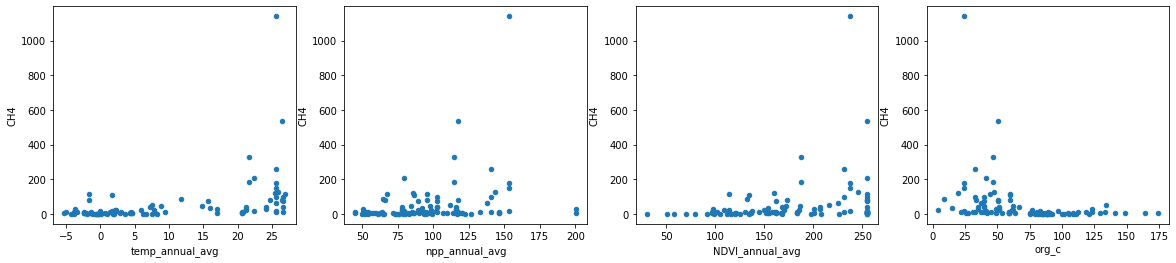

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,4))
df.plot(ax=axes[0], kind='scatter', x='temp_annual_avg', y='CH4')
df.plot(ax=axes[1], kind='scatter', x='npp_annual_avg', y='CH4')
df.plot(ax=axes[2], kind='scatter', x='NDVI_annual_avg', y='CH4')
df.plot(ax=axes[3], kind='scatter', x='org_c', y='CH4')
plt.show()

### Temp seasonal avgs

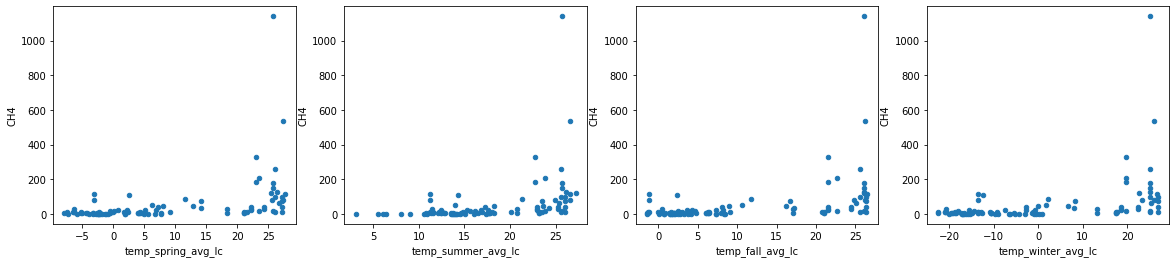

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,4))
df.plot(ax=axes[0], kind='scatter', x='temp_spring_avg_lc', y='CH4')
df.plot(ax=axes[1], kind='scatter', x='temp_summer_avg_lc', y='CH4')
df.plot(ax=axes[2], kind='scatter', x='temp_fall_avg_lc', y='CH4')
df.plot(ax=axes[3], kind='scatter', x='temp_winter_avg_lc', y='CH4')
plt.show()

### NPP seasonal avgs


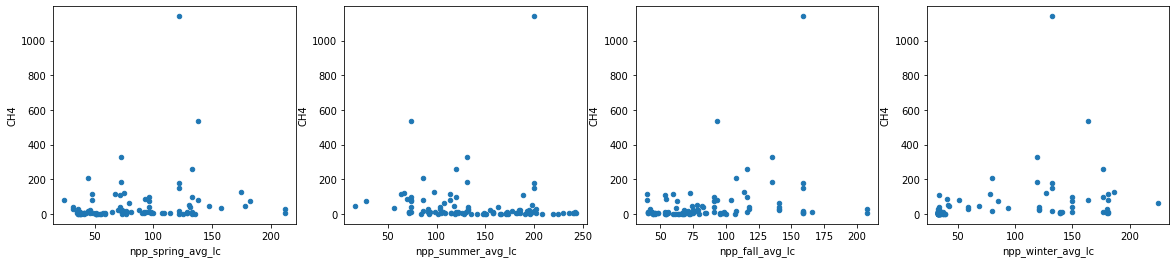

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,4))
df.plot(ax=axes[0], kind='scatter', x='npp_spring_avg_lc', y='CH4')
df.plot(ax=axes[1], kind='scatter', x='npp_summer_avg_lc', y='CH4')
df.plot(ax=axes[2], kind='scatter', x='npp_fall_avg_lc', y='CH4')
df.plot(ax=axes[3], kind='scatter', x='npp_winter_avg_lc', y='CH4')
plt.show()

### NDVI seasonal avgs


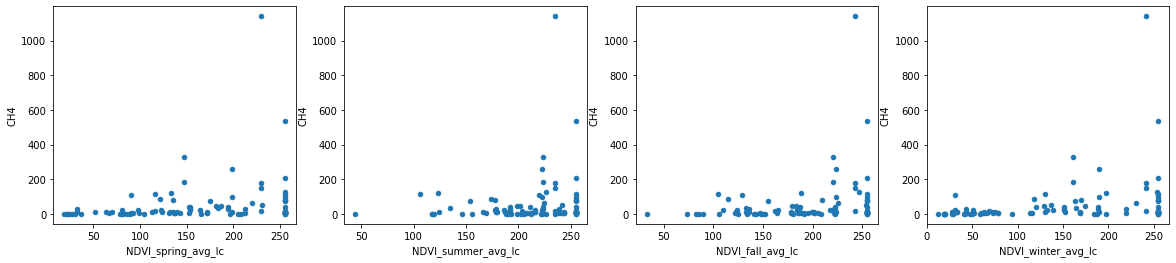

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,4))
df.plot(ax=axes[0], kind='scatter', x='NDVI_spring_avg_lc', y='CH4')
df.plot(ax=axes[1], kind='scatter', x='NDVI_summer_avg_lc', y='CH4')
df.plot(ax=axes[2], kind='scatter', x='NDVI_fall_avg_lc', y='CH4')
df.plot(ax=axes[3], kind='scatter', x='NDVI_winter_avg_lc', y='CH4')
plt.show()